In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap
import hdbscan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import sys
import argparse
import geopy.distance

In [3]:
stocks = pd.read_csv("data/SP500_stock.csv", index_col = 0)

In [4]:
stocks['stock_change'] = stocks['close'] - stocks['open'] # Create new column of difference between close and open values
stocks = stocks.drop(['open','high','low','close','volume'], axis=1) # Drop unnecessary columns
stocks = stocks.reset_index() 
stocks = stocks.pivot(index='Name', columns='date') # Restructure dataframe

stocks = stocks.fillna(0) #pandas version of replacing NaN values to 0

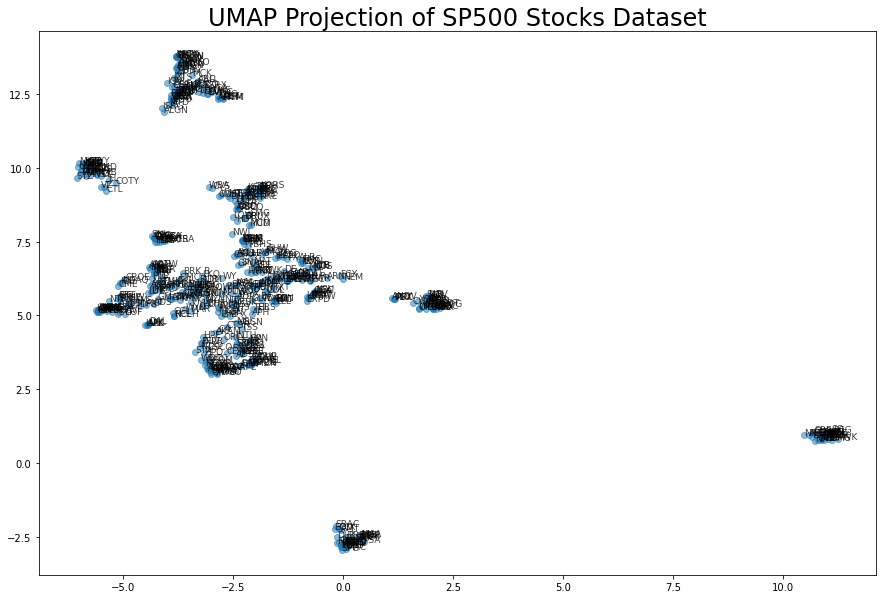

In [23]:
#print(stocks.head(5))
# create two arrays of values and index (companies)
movements = stocks.values
companies = stocks.index
    
# sklearn's normalize function to convert values into the same scale
normalized_movements = normalize(movements)

    # UMAP application
standard_embedding = umap.UMAP().fit_transform(normalized_movements)

    # create two more arrays of resulting features to go into x and y coordinates of scatter plot
xs = standard_embedding[:,0]
ys = standard_embedding[:,1]

test_list = []

    #scatter plot
fig, ax = plt.subplots(figsize = [15, 10])
scat = plt.scatter(xs, ys, alpha=0.5)

for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=9, alpha=0.75)
    test_list.append([company,[x,y]])
plt.tight_layout
plt.title('UMAP Projection of SP500 Stocks Dataset', fontsize=24)
plt.show()

In [25]:
print(companies[0],xs[0],ys[0])

A -3.8926687 12.115238


In [44]:
#print(scat.get_offsets())
print(test_list[4])
print(test_list[7])

['ABBV', [-3.7460196, 13.223823]]
['ACN', [-2.6853766, 5.039479]]


In [50]:
print(geopy.distance.distance(test_list[4][1], test_list[7][1]))

917.1663319072403 km


In [101]:
res = [test_list[0]]
excess = []
for a in test_list[1:]:
    if geopy.distance.distance(test_list[0][1], a[1]) < 250:
        res +=[a]
    else:
        excess.append(a)


In [110]:
restwo=[excess[0]]
excesstwo = []
for a in excess[1:]:
    if geopy.distance.distance(excess[0][1], a[1]) < 250:
        restwo +=[a]
    else:
        excesstwo.append(a)

In [111]:
#print(restwo)

[['AAL', [-4.448064, 4.6791463]], ['ACN', [-2.6853766, 5.039479]], ['ADI', [-3.0683181, 3.150321]], ['ADM', [-3.203384, 6.1692176]], ['ADP', [-2.4166923, 5.5804043]], ['ADS', [-4.288733, 5.393601]], ['AFL', [-4.195163, 6.096693]], ['AIG', [-4.3293123, 6.0622287]], ['AIZ', [-4.3709245, 5.978579]], ['AJG', [-4.396644, 6.637982]], ['AKAM', [-2.8959968, 4.4032416]], ['ALK', [-4.4304967, 4.672688]], ['ALL', [-4.2551074, 6.458147]], ['AMD', [-2.8903134, 3.1361415]], ['AMG', [-3.4742877, 5.6932735]], ['AMP', [-3.8949587, 5.569758]], ['ANSS', [-2.3234887, 3.9288654]], ['AON', [-4.3364177, 6.681099]], ['APTV', [-2.752177, 5.7118483]], ['AXP', [-4.466404, 5.364421]], ['BAC', [-5.1080933, 5.2977552]], ['BBT', [-5.4844804, 5.174945]], ['BEN', [-3.3427308, 5.956466]], ['BHF', [-3.087216, 5.351386]], ['BHGE', [-2.6566627, 5.92179]], ['BK', [-5.094895, 5.6097426]], ['BLK', [-3.408445, 5.9586606]], ['BRK.B', [-3.6334634, 6.436872]], ['BWA', [-3.8197203, 5.5807896]], ['C', [-4.9142103, 5.325672]], ['CA